<a href="https://colab.research.google.com/github/WillG001/data_analysis/blob/main/%E3%80%8COnlineRetail_%E4%BA%A4%E6%98%93%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90%E5%B0%88%E9%A1%8C_Python_%E3%80%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#資料集

##介紹

這是在UCI上公開的真實資料，為某跨國零售商2010/1/12～2011/9/12的所有交易。該公司註冊在英國，主要銷售獨特的全場合禮品，多數客戶為批發商。


https://archive.ics.uci.edu/ml/datasets/online%20retail

##匯入

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dfUCI = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')

In [ ]:
dfUCI.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


##行列數量

In [ ]:
dfUCI.shape

(541909, 8)

##行名稱及類型

In [ ]:
dfUCI.dtypes.to_frame()

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


##遺漏值


In [ ]:
null_data = pd.DataFrame()
null_data['columns'] = list(dfUCI.columns)
null_data['null(%)'] = list(dfUCI.isnull().sum() / len(dfUCI) * 100)
null_data
#查看遺漏值佔各欄位資料的百分比

,columns,null(%)
0,InvoiceNo,0.000000
1,StockCode,0.000000
2,Description,0.268311
3,Quantity,0.000000
4,InvoiceDate,0.000000
5,UnitPrice,0.000000
6,CustomerID,24.926694
7,Country,0.000000


CustomerID有24.9%的遺漏值，如果對個別客戶進行分析則需要注意。






#前言

發現英國的銷量遠大於其他國家，但他們的「禮品文化」或「人口數量」並沒有對應這樣的銷量，表示該地區的行銷存在優勢，值得我們分析探討背後原因。

In [ ]:
country_matrix = dfUCI.pivot_table(
    index='Country', 
    values=['Quantity'],
    aggfunc='sum')
# 樞紐分析找出各國總銷量
country_matrix.sort_values(by='Quantity', ascending=False).head(10)
# 各國總銷量排行前10名

,Quantity
Country,
United Kingdom,4263829
Netherlands,200128
EIRE,142637
Germany,117448
France,110480
Australia,83653
Sweden,35637
Switzerland,30325
Spain,26824


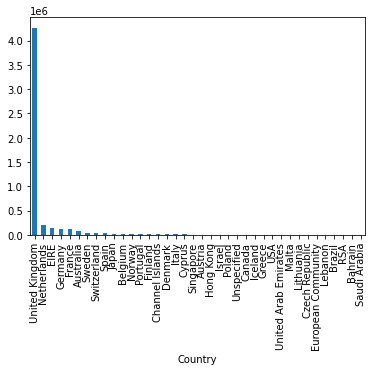

In [ ]:
country_matrix.sort_values(by='Quantity', ascending=False)['Quantity'].plot(kind='bar')
# 各國總銷量排行長條圖 

#資料分析

行銷分成產品、價格、推廣及通路，試著從這四個面向去分析英國銷量突出的原因。

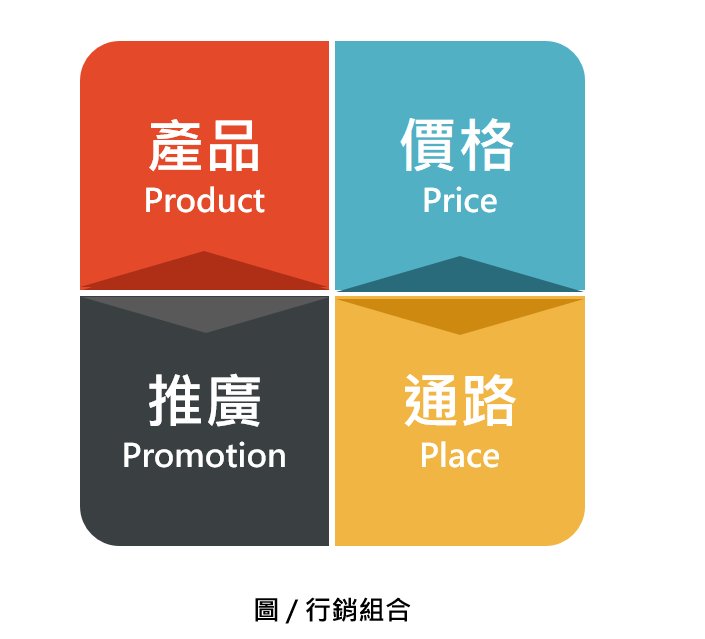


## 價格



分析：比較各國的平均產品價格後，發現英國沒有採取低價策略，所以價格並非英國銷量突出的原因。

In [ ]:
dfUCI['Revenu'] = dfUCI['Quantity'] * dfUCI['UnitPrice']
# 計算各訂單的收入

In [ ]:
country_matrix[['Quantity', 'Revenu']] = dfUCI.pivot_table(
    index='Country', 
    values=['Quantity', 'Revenu'],
    aggfunc='sum')
country_matrix[['Quantity', 'Revenu']].head(10)
# 樞紐分析找出各國總銷量及收入

,Quantity,Revenu
Country,,
Australia,83653,137077.27
Austria,4827,10154.32
Bahrain,260,548.40
Belgium,23152,40910.96
Brazil,356,1143.60
Canada,2763,3666.38
Channel Islands,9479,20086.29
Cyprus,6317,12946.29
Czech Republic,592,707.72


In [ ]:
country_matrix['UnitPrice'] = country_matrix['Revenu'] / country_matrix['Quantity']
# 計算平均產品價格

In [ ]:
country_matrix.sort_values(by='UnitPrice', ascending=False).drop(labels=['Quantity', 'Revenu'], axis=1).tail(10)
# 各國以平均產品價格排行後10名

,UnitPrice
Country,
Saudi Arabia,1.748933
Singapore,1.742528
USA,1.674004
Australia,1.638641
Unspecified,1.439330
Netherlands,1.422397
Japan,1.401405
Canada,1.326956
Czech Republic,1.195473


##通路

分析：比較各國的通路數量後，發現通路數量可能是英國銷量突出的原因。通路數量多有「提供消費者便利性」的優勢，不過從「便利商店沒有販售禮品」及「英國的送禮文化」來看，英國消費者對禮品沒有便利性的需求，所以通路數量並非英國銷量突出原因。

In [ ]:
country_matrix['channel'] = dfUCI.pivot_table(
    index='Country', 
    values=['CustomerID'],
    aggfunc=lambda x: len(x.unique()))
country_matrix['channel'].sort_values(ascending=False).head(10).to_frame()
# 樞紐分析找出各國的批發商數量

,channel
Country,
United Kingdom,3951
Germany,95
France,88
Spain,31
Belgium,25
Switzerland,22
Portugal,20
Italy,15
Finland,12


##產品

分析1：發現「產品種類」和「銷量」高度相關，產品種類多有「更貼近顧客所需」的優勢。該公司註冊在英國且銷售獨特的禮品，產品開發有可能以英國市場為主，不過也可能是市場越大產品需求越多元，就如同美國的產品種類較台灣來的多樣。

討論：目前不確定英國銷售突出的原因，可能是「產品開發以英國市場為主」或「市場越大產品需求越多元」，那這邊我有想到驗證的方法，協同過濾是用來計算顧客間相似度，若將資料從顧客擴大到國家，可以計算國家間相似度，若產品開發確實以英國市場為主，那與英國市場越相似的國家，理論上他們的銷量會表現越好。

In [ ]:
country_matrix['stock'] = dfUCI.pivot_table(
    index='Country',
    values=['StockCode'],
    aggfunc=lambda x: len(x.unique()))
country_matrix['stock'].sort_values(ascending=False).head(10).to_frame()
# 樞紐分析找出各國銷售的產品種類

,stock
Country,
United Kingdom,4065
EIRE,1976
Germany,1671
France,1543
Spain,1093
Switzerland,978
Netherlands,785
Belgium,778
Portugal,706


In [ ]:
country_matrix['Quantity'].sort_values(ascending=False).head(10).to_frame()
# 各國總銷量排行前10名

,Quantity
Country,
United Kingdom,4263829
Netherlands,200128
EIRE,142637
Germany,117448
France,110480
Australia,83653
Sweden,35637
Switzerland,30325
Spain,26824


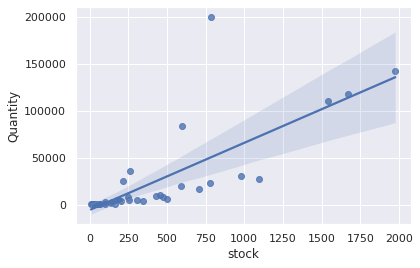

In [ ]:
sns.set_theme(color_codes=True)
sns.regplot(
    x=country_matrix['stock'].drop(labels='United Kingdom', axis=0),
    y=country_matrix['Quantity'].drop(labels='United Kingdom', axis=0),
    )
# 產品種類與銷量的分佈圖及迴歸分析（判斷相關係數的參考性）

In [ ]:
country_matrix[['stock', 'Quantity']].drop(labels='United Kingdom', axis=0).corr()
# 產品種類與銷量的相關係數

,stock,Quantity
stock,1.000000,0.755852
Quantity,0.755852,1.000000




---



分析2：從「與英國市場相似度」和「銷量」高度相關，我們可以確認「產品開發以英國市場為主」為英國銷量突出得原因。

In [ ]:
country_item_matrix = dfUCI.pivot_table(
    index='Country', 
    columns='StockCode', 
    values='Quantity',
    aggfunc='sum'
)
country_item_matrix.head()
# 樞紐分析找出各國在各品項的總銷量

StockCode,10002,10080,10120,10125,10133,10134,10135,11001,15030,15034,...,M,PADS,POST,S,gift_0001_10,gift_0001_20,gift_0001_30,gift_0001_40,gift_0001_50,m
Country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bahrain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,272.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
country_item_matrix = country_item_matrix.applymap(lambda x: 1 if x > 0 else 0)
country_item_matrix.head()
# 有銷量的值轉成1 無銷量的值轉成0 

StockCode,10002,10080,10120,10125,10133,10134,10135,11001,15030,15034,...,M,PADS,POST,S,gift_0001_10,gift_0001_20,gift_0001_30,gift_0001_40,gift_0001_50,m
Country,,,,,,,,,,,,,,,,,,,,,
Australia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Austria,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Bahrain,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Belgium,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Brazil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = pd.DataFrame(
    cosine_similarity(country_item_matrix)
)
similarity_matrix.head()
# 計算各國間的相似度

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,1.000000,0.333069,0.051288,0.450108,0.130558,0.247042,0.354594,0.307668,0.034222,0.320469,...,0.193952,0.068384,0.222051,0.427191,0.333343,0.466002,0.215410,0.164197,0.393410,0.283164
1,0.333069,1.000000,0.100041,0.388608,0.151585,0.108445,0.270481,0.218181,0.047680,0.268624,...,0.135113,0.057166,0.167578,0.388091,0.294260,0.402360,0.185790,0.201040,0.281998,0.231165
2,0.051288,0.100041,1.000000,0.071935,0.176777,0.082479,0.012070,0.112253,0.000000,0.015875,...,0.032827,0.000000,0.056373,0.098940,0.015504,0.087980,0.031250,0.030317,0.061254,0.026958
3,0.450108,0.388608,0.071935,1.000000,0.101731,0.255123,0.369880,0.319768,0.052498,0.351727,...,0.188911,0.083924,0.200058,0.510253,0.385895,0.543131,0.215805,0.157021,0.449440,0.325792
4,0.130558,0.151585,0.176777,0.101731,1.000000,0.087482,0.085349,0.142875,0.000000,0.056127,...,0.023212,0.000000,0.079724,0.118396,0.043853,0.141390,0.066291,0.085749,0.092401,0.066718


In [ ]:
similarity_matrix.columns = country_item_matrix.index
similarity_matrix.index = country_item_matrix.index
similarity_matrix.head()
# 補上index和column

Country,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
Country,,,,,,,,,,,,,,,,,,,,,
Australia,1.000000,0.333069,0.051288,0.450108,0.130558,0.247042,0.354594,0.307668,0.034222,0.320469,...,0.193952,0.068384,0.222051,0.427191,0.333343,0.466002,0.215410,0.164197,0.393410,0.283164
Austria,0.333069,1.000000,0.100041,0.388608,0.151585,0.108445,0.270481,0.218181,0.047680,0.268624,...,0.135113,0.057166,0.167578,0.388091,0.294260,0.402360,0.185790,0.201040,0.281998,0.231165
Bahrain,0.051288,0.100041,1.000000,0.071935,0.176777,0.082479,0.012070,0.112253,0.000000,0.015875,...,0.032827,0.000000,0.056373,0.098940,0.015504,0.087980,0.031250,0.030317,0.061254,0.026958
Belgium,0.450108,0.388608,0.071935,1.000000,0.101731,0.255123,0.369880,0.319768,0.052498,0.351727,...,0.188911,0.083924,0.200058,0.510253,0.385895,0.543131,0.215805,0.157021,0.449440,0.325792
Brazil,0.130558,0.151585,0.176777,0.101731,1.000000,0.087482,0.085349,0.142875,0.000000,0.056127,...,0.023212,0.000000,0.079724,0.118396,0.043853,0.141390,0.066291,0.085749,0.092401,0.066718


In [ ]:
country_matrix["similarity"] = similarity_matrix['United Kingdom']
country_matrix["similarity"].sort_values(ascending=False).head(10).to_frame()
# 各國與英國的相似度排行前10名

,similarity
Country,
United Kingdom,1.000000
EIRE,0.703804
Germany,0.653659
France,0.630162
Spain,0.527103
Switzerland,0.504290
Netherlands,0.451808
Belgium,0.449440
Portugal,0.430014


In [ ]:
country_matrix['Quantity'].sort_values(ascending=False).head(10).to_frame()
# 各國總銷量排行前10名

,Quantity
Country,
United Kingdom,4263829
Netherlands,200128
EIRE,142637
Germany,117448
France,110480
Australia,83653
Sweden,35637
Switzerland,30325
Spain,26824


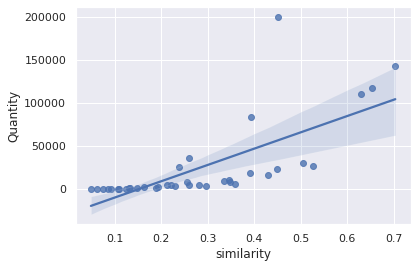

In [ ]:
sns.set_theme(color_codes=True)
sns.regplot(
    x=country_matrix['similarity'].drop(labels='United Kingdom', axis=0),
    y=country_matrix['Quantity'].drop(labels='United Kingdom', axis=0),
    )
# 與英國市場相似度和銷量的分佈圖及迴歸分析（判斷相關係數的參考性）

In [ ]:
country_matrix[['similarity', 'Quantity']].drop(labels='United Kingdom', axis=0).corr()
# 與英國市場相似度和銷量的相關係數

,similarity,Quantity
similarity,1.000000,0.713168
Quantity,0.713168,1.000000


##推廣

雖然沒有資料讓我們從推廣面向進行分析，不過從「英國市場相似度」和「銷量」高度相關，英國銷量突出的主要原因已經被我們發現。



#結論

英國銷量突出的關鍵在於產品開發以英國市場為主，如果要提升總銷售，對於與英國市場相似低的國家，得組織當地的產品開發團隊，才能銷售符合該市場的產品，當然還要考量到競爭力，需分析當地競爭者的產品開發能力，選擇有優勢的市場進入，並將英國的產品開發模式轉移過去。


